In [2]:
library(tidyverse)
library(corrplot)   
library(scales)      
library(viridis) 

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   4.0.0     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


### Data cleaning

In [ ]:
data_raw <- read.csv(
  "Predator_and_prey_body_sizes_in_marine_food_webs.csv",
  header = TRUE,
  sep = "\t",
  quote = "",
  check.names = TRUE,
  strip.white = TRUE,
  fileEncoding = "latin1"
)

cols_to_keep <- c("X.Record_number", "Individual_ID", "Predator",
                  "Predator._taxon", "Predator_lifestage",
                  "Type_of_feeding_interaction", "Standardised.predator.length",
                  "SI.predator.mass", "Diet.coverage",
                  "Prey", "Prey.taxon", "SI.prey.length", "SI.prey.mass",
                  "Geographic.location", "Latitude", "Longitude",
                  "Depth", "Mean.annual.temp", "SD.annual.temp",
                  "Mean.PP", "SD.PP", "Specific.habitat")

data_clean <- data_raw[, cols_to_keep, drop = FALSE]

head(data_clean)

Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
"entr'ee incorrecte trouv'ee dans la connexion en entr'ee 'Predator_and_prey_body_sizes_in_marine_food_webs.csv'"


X.Record_number Individual_ID Predator                   Predator._taxon     
1 "1              1             Rhizoprionodon terraenovae ectotherm vertebrate
2 "2              2             Rhizoprionodon terraenovae ectotherm vertebrate
3 "3              3             Rhizoprionodon terraenovae ectotherm vertebrate
4 "4              4             Rhizoprionodon terraenovae ectotherm vertebrate
5 "5              5             Rhizoprionodon terraenovae ectotherm vertebrate
6 "6              6             Rhizoprionodon terraenovae ectotherm vertebrate
  Predator_lifestage Type_of_feeding_interaction Standardised.predator.length
1 adult              predacious/piscivorous       93.990                     
2 adult              predacious/piscivorous       95.195                     
3 adult              predacious/piscivorous      100.020                     
4 adult              predacious/piscivorous       34.945                     
5 adult              predacious/piscivorous       31.330                     
6 adult              predacious/piscivorous       33.740                     
  SI.predator.mass Diet.coverage Prey                          ... SI.prey.mass
1 1539.900         all           teleosts/molluscs/crustaceans ... 14.2740     
2 1597.800         all           teleosts/molluscs/crustaceans ...  6.0213     
3 1843.600         all           teleosts/molluscs/crustaceans ... 11.8930     
4   87.631         all           teleosts/molluscs/crustaceans ...  8.1220     
5   63.866         all           teleosts/molluscs/crustaceans ...  6.5623     
6   79.161         all           teleosts/molluscs/crustaceans ...  5.4065     
  Geographic.location             Latitude Longitude Depth Mean.annual.temp
1 ""Apalachicola Bay"," Florida"" 29""40'N 85""10'W  30    24.1            
2 ""Apalachicola Bay"," Florida"" 29""40'N 85""10'W  30    24.1            
3 ""Apalachicola Bay"," Florida"" 29""nN   85""10'W  30    24.1            
4 ""Apalachicola Bay"," Florida"" 29""40'N 85""10'W  30    24.1            
5 ""Apalachicola Bay"," Florida"" 29""40'N 85""10'W  30    24.1            
6 ""Apalachicola Bay"," Florida"" 29""40'N 85""10'W  30    24.1            
  SD.annual.temp Mean.PP SD.PP Specific.habitat
1 4.2            866     214   Coastal Bay     
2 4.2            866     214   Coastal Bay     
3 4.2            866     214   Coastal Bay     
4 4.2            866     214   Coastal Bay     
5 4.2            866     214   Coastal Bay     
6 4.2            866     214   Coastal Bay

[1] 59 22

### Visualization

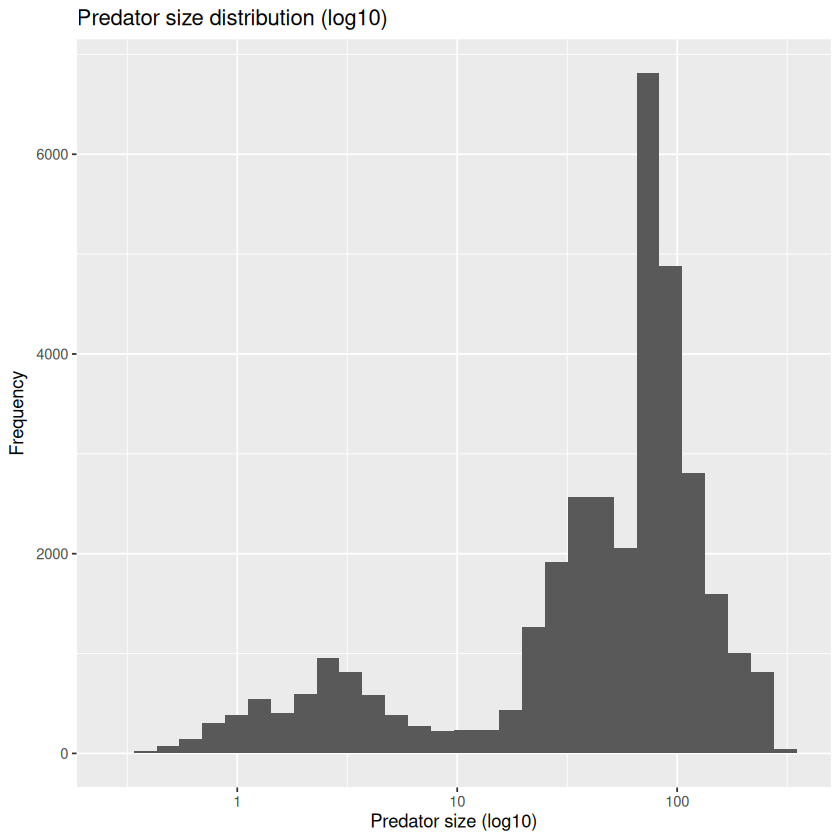

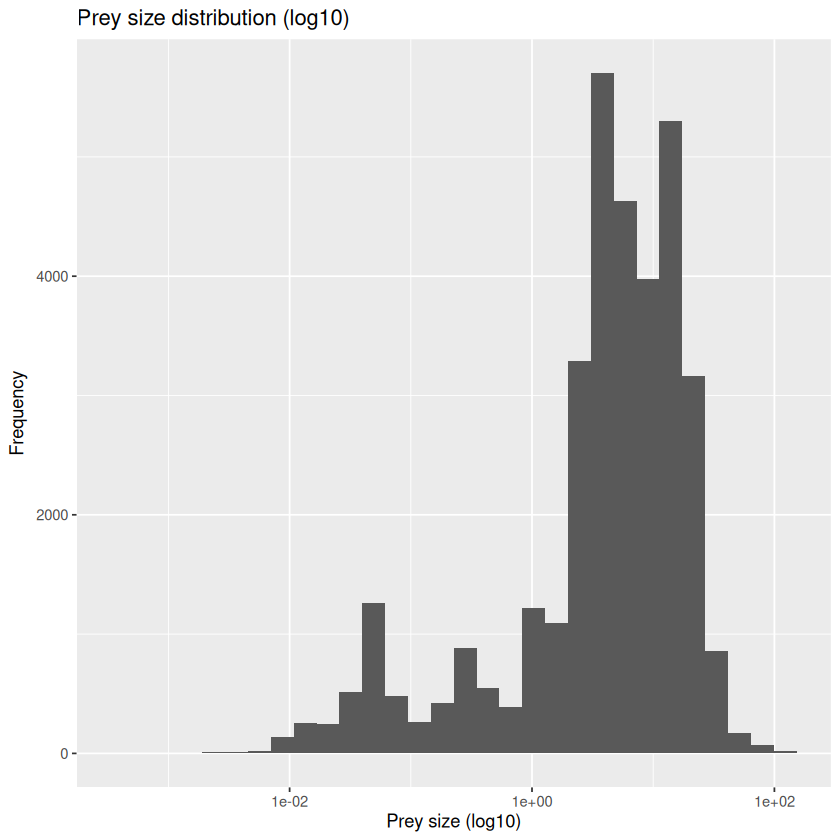

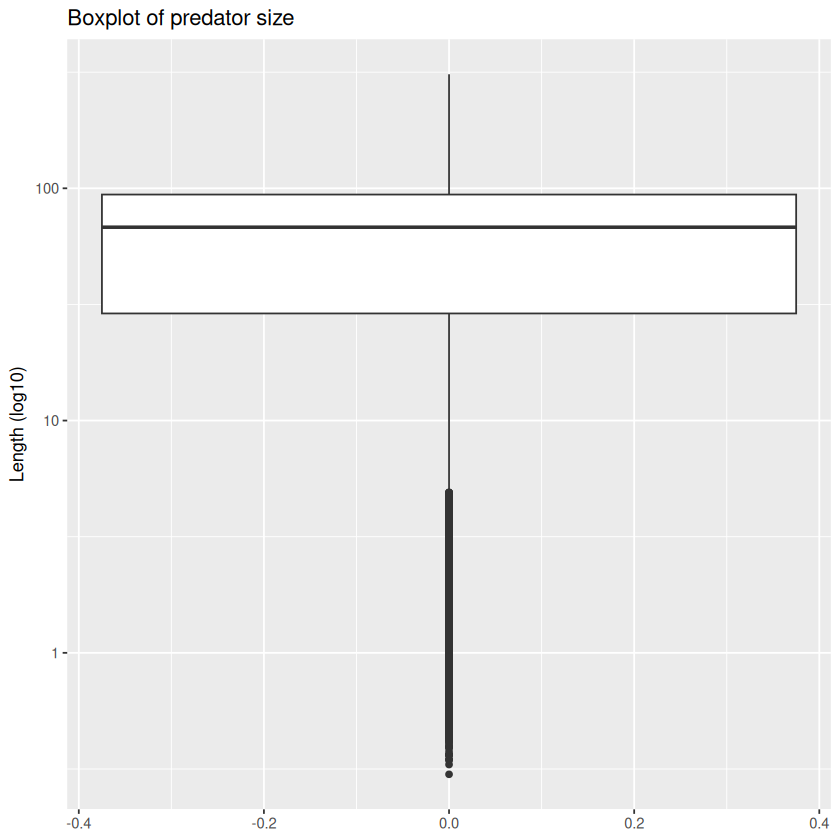

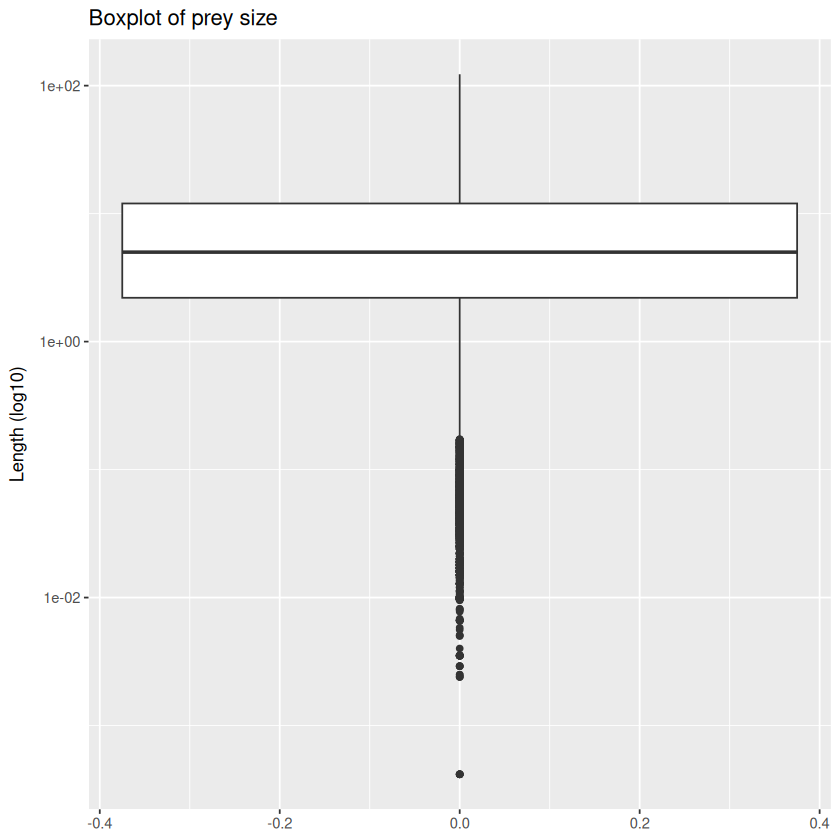

In [5]:
ggplot(data_clean, aes(x = Standardised.predator.length)) +
  geom_histogram(bins = 30) +
  scale_x_log10() +
  labs(title = "Predator size distribution (log10)",
       x = "Predator size (log10)", y = "Frequency")

ggplot(data_clean, aes(x = SI.prey.length)) +
  geom_histogram(bins = 30) +
  scale_x_log10() +
  labs(title = "Prey size distribution (log10)",
       x = "Prey size (log10)", y = "Frequency")

ggplot(data_clean, aes(y = Standardised.predator.length)) +
  geom_boxplot() +
  scale_y_log10() +
  labs(title = "Boxplot of predator size", y = "Length (log10)")

ggplot(data_clean, aes(y = SI.prey.length)) +
  geom_boxplot() +
  scale_y_log10() +
  labs(title = "Boxplot of prey size", y = "Length (log10)")